In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE) 
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

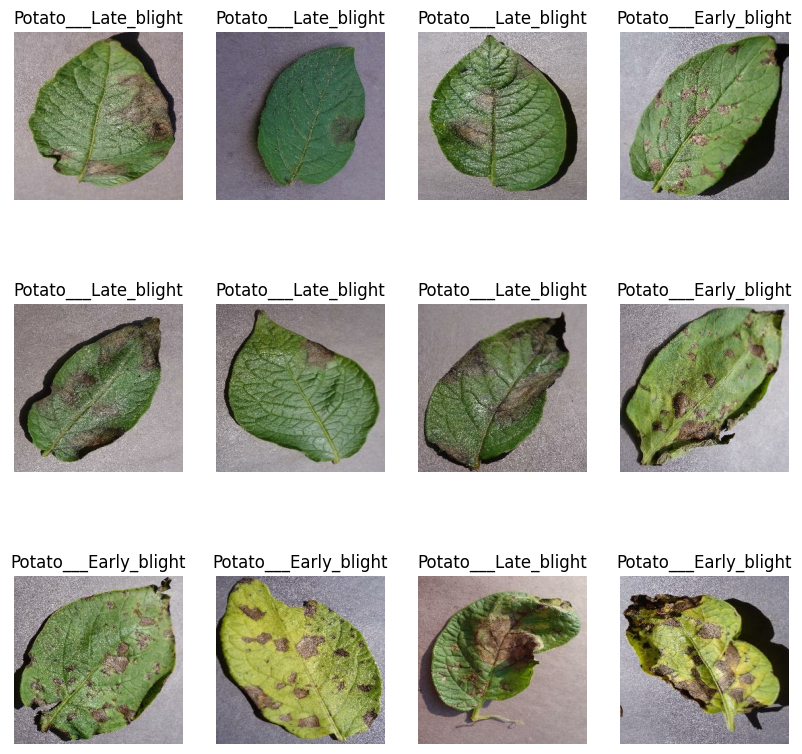

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [30]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [31]:
train_ds=dataset.take(54)
len(train_ds)

54

In [32]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [33]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [34]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [35]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [8]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.take(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [9]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds)

54

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale= tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [15]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [42]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),              
      
])
model.build(input_shape=input_shape)

In [43]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [45]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4359 - loss: 0.9397 - val_accuracy: 0.5521 - val_loss: 0.8014
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.6595 - loss: 0.7089 - val_accuracy: 0.8906 - val_loss: 0.3121
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8611 - loss: 0.3593 - val_accuracy: 0.9427 - val_loss: 0.1912
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9038 - loss: 0.2636 - val_accuracy: 0.8854 - val_loss: 0.2952
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8825 - loss: 0.2804 - val_accuracy: 0.9115 - val_loss: 0.2102
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9054 - loss: 0.2482 - val_accuracy: 0.8958 - val_loss: 0.2493
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9392 - loss: 0.1569 - val_accuracy: 0.9688 - val_loss: 0.0722
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9535 - loss: 0.1122 - val_accuracy: 0.9323 - val_

In [46]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.9853 - loss: 0.0447


In [47]:
scores

[0.059208936989307404, 0.98046875]

In [49]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

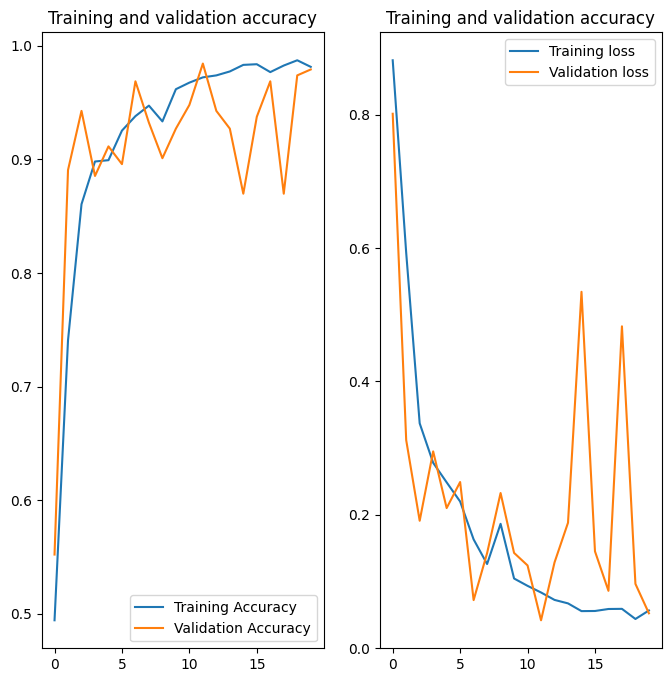

In [50]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title("Training and validation accuracy")
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
predicted label: Potato___Late_blight


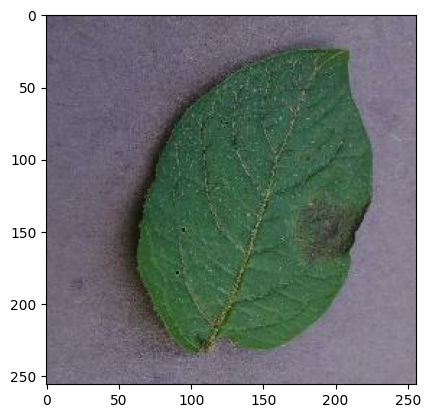

In [51]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [52]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)#creat a batch
    predictions =model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


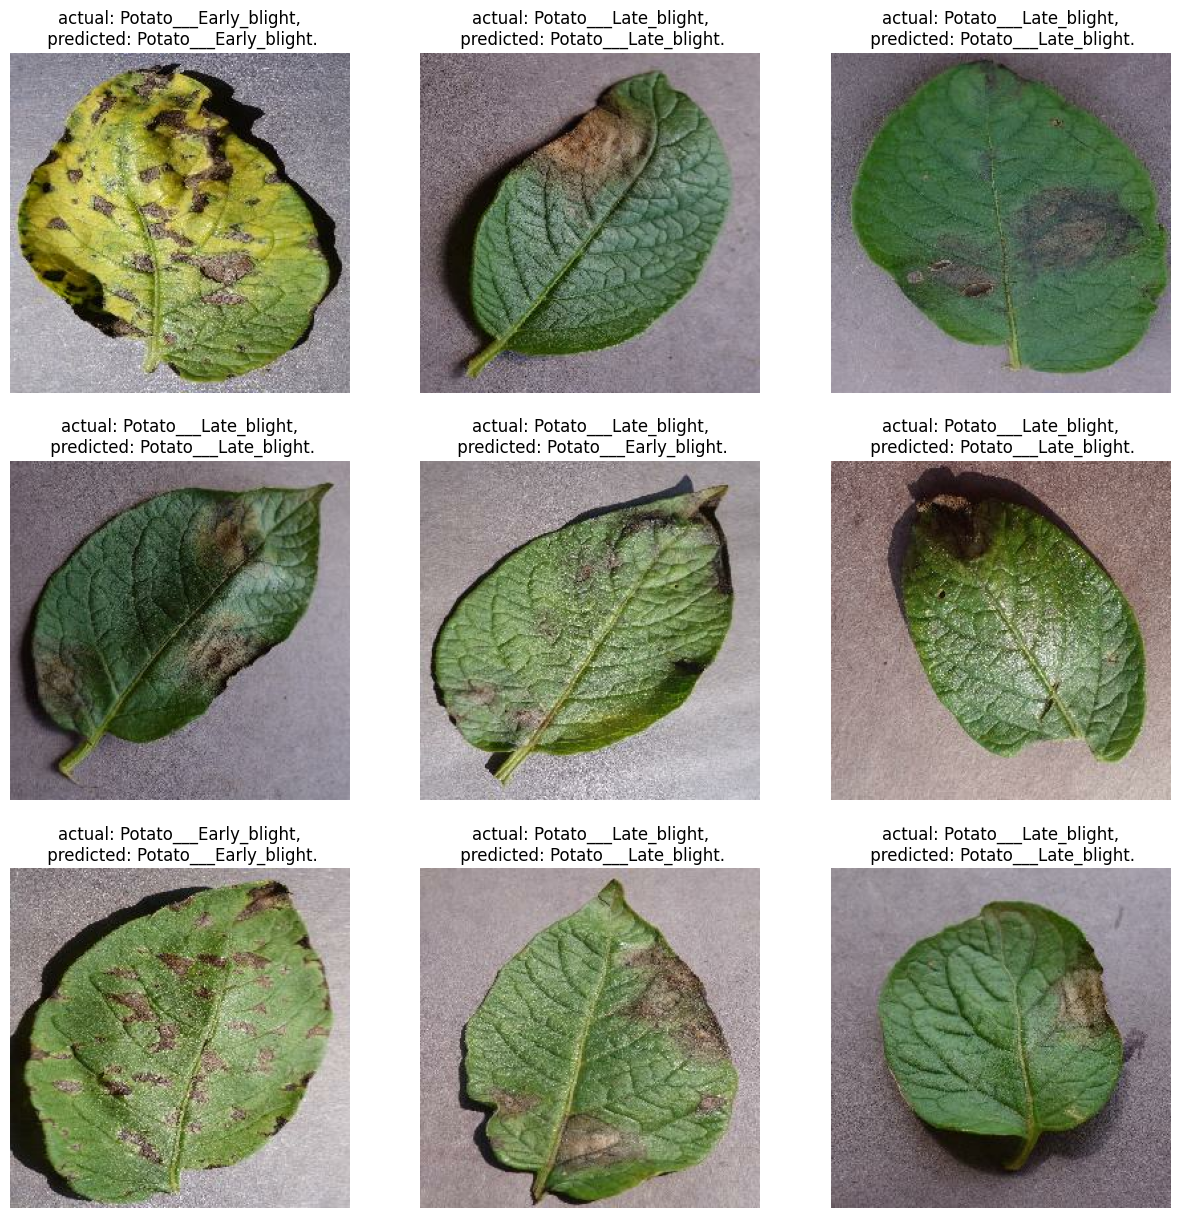

In [53]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"actual: {actual_class},\n predicted: {predicted_class}.")
        
        plt.axis("off")
        

In [60]:
model_version = 1
model.save(f"../models/{model_version}.keras")

In [16]:
from tensorflow.keras.applications import VGG16, ResNet50

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
def vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
def train_model(model, train_ds, val_ds, epochs):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[early_stopping]
    )
    
    return history

In [19]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = len(class_names)

vgg16_model = vgg16_model(input_shape, num_classes)
history_vgg16 = train_model(vgg16_model, train_ds, val_ds, EPOCHS)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 682s 13s/step - accuracy: 0.7307 - loss: 0.6886 - val_accuracy: 0.8698 - val_loss: 0.3581
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 692s 13s/step - accuracy: 0.9051 - loss: 0.2996 - val_accuracy: 0.8958 - val_loss: 0.2719
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 700s 13s/step - accuracy: 0.9034 - loss: 0.2533 - val_accuracy: 0.8698 - val_loss: 0.3086
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 693s 13s/step - accuracy: 0.9271 - loss: 0.2186 - val_accuracy: 0.9115 - val_loss: 0.1881
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 692s 13s/step - accuracy: 0.9486 - loss: 0.1661 - val_accuracy: 0.9271 - val_loss: 0.1808
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 694s 13s/step - accuracy: 0.9431 - loss: 0.1555 - val_accuracy: 0.9271 - val_loss: 0.1743
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 691s 13s/step - accuracy: 0.9394 - loss: 0.1618 - val_accuracy: 0.8698 - val_loss: 0.3055
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 689s 13s/step - accuracy: 0.9426 - loss: 0.1575 - val_accuracy: 0.

In [20]:
vgg16_eval = vgg16_model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 10s/step - accuracy: 0.9472 - loss: 0.1325


In [21]:
vgg16_eval

[0.11590072512626648, 0.95703125]

In [22]:
acc=history_vgg16.history['accuracy']
val_acc=history_vgg16.history['val_accuracy']

loss=history_vgg16.history['loss']
val_loss=history_vgg16.history['val_loss']

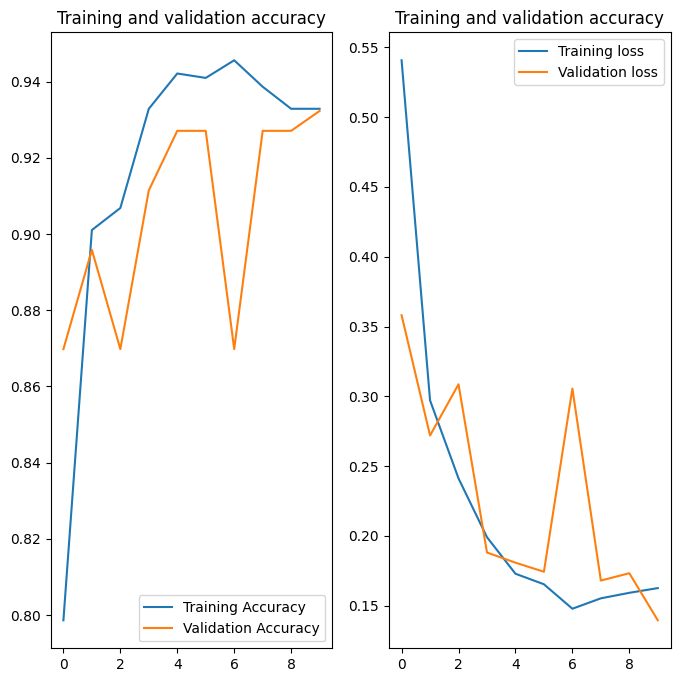

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title("Training and validation accuracy")
plt.show()

In [24]:
def resnet50_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    
    model = models.Sequential([
        resize_and_rescale,
        data_augmentation,
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
resnet50_model = resnet50_model(input_shape, num_classes)
history_resnet50 = train_model(resnet50_model, train_ds, val_ds, EPOCHS)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 61s 1us/step
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.4804 - loss: 1.1473 - val_accuracy: 0.7500 - val_loss: 0.7468
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.7369 - loss: 0.6937 - val_accuracy: 0.4531 - val_loss: 1.1841
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 246s 5s/step - accuracy: 0.6186 - loss: 0.8458 - val_accuracy: 0.7552 - val_loss: 0.6615
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.7463 - loss: 0.6280 - val_accuracy: 0.7604 - val_loss: 0.6756
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.7671 - loss: 0.6059 - val_accuracy: 0.7656 - val_loss: 0.6089
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.7750 - loss: 0.5893 - val_accuracy: 0.7604 - val_loss: 0.6684
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.7827 - loss: 0.5983 - val_accuracy: 0.7656 - val_loss: 0.6797
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accura

In [27]:
 resnet50_model = resnet50_model.evaluate(test_ds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8474 - loss: 0.4123


In [28]:
resnet50_model

[0.45673733949661255, 0.83203125]

In [29]:
acc=history_resnet50.history['accuracy']
val_acc=history_resnet50.history['val_accuracy']

loss=history_resnet50.history['loss']
val_loss=history_resnet50.history['val_loss']

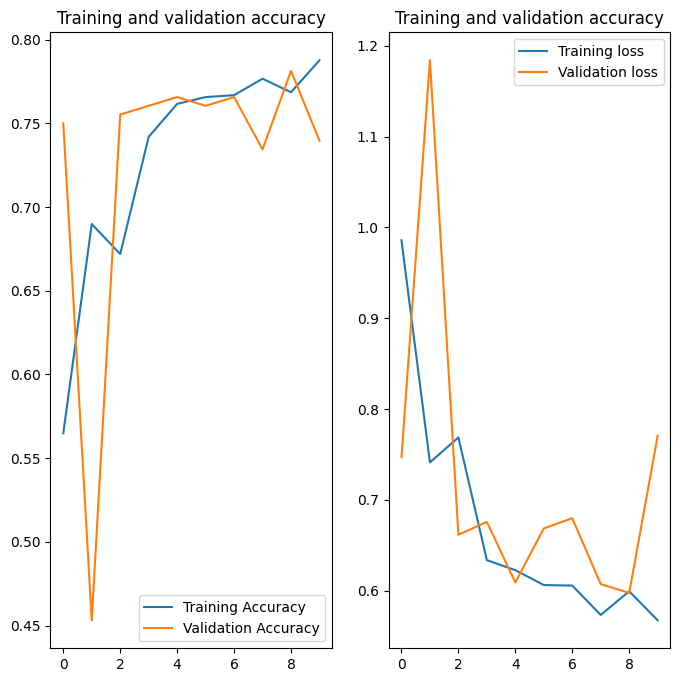

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title("Training and validation accuracy")
plt.show()